# Zmienność

## Wprowadzenie

<div align="center">
  <div style="text-align: justify; max-width: 600px;">

  <strong>Zmienność (volatility)</strong><br><br>
  Najczęściej definiowana jest jako miara zmienności cen instrumentów finansowych w czasie.  

  Mówiąc najprościej: <strong>im większa zmienność, tym mniej przewidywalne stają się przyszłe ceny aktywów</strong>, co naturalnie prowadzi do większego ryzyka inwestycyjnego.  
  
  Przeważnie przyjmuje się, że zmienność wyrażona jest za pomocą <strong>odchylenia standardowego</strong>, jednak można stosować inne reprezentacje, np. <strong>MAD</strong> (<em>Mean Absolute Deviation</em> – średnie odchylenie bezwzględne).

  </div>
</div>


### Problemy odchylenia standardowego

In [1]:
import pandas as pd
import yfinance as yf
import numpy as np
import plotly.express as px


In [54]:
# Tickery
tickers = ['CDR.WA', 'AAPL', 'AIR']

In [55]:
# Dane
data = yf.download(tickers).Close
data = data.dropna()
data

[*********************100%***********************]  3 of 3 completed


Ticker,AAPL,AIR,CDR.WA
Date,,,
2000-01-03,0.842150,15.015814,36.106369
2000-01-04,0.771149,15.069254,35.329937
2000-01-05,0.782433,15.229567,35.135777
2000-01-06,0.714723,15.336440,35.291084
2000-01-07,0.748578,15.870811,40.376984
...,...,...,...
2025-03-21,218.270004,67.930000,222.699997
2025-03-24,220.729996,69.970001,223.800003
2025-03-25,223.750000,69.620003,229.699997


In [56]:
#Odchylenie standardowe dla wszystkich danych
data.std()

Ticker
AAPL      62.036889
AIR       15.596663
CDR.WA    88.525096
dtype: float64

Wzór na współczynnik zmienności (coefficient of variation, CV):

$$
CV = \frac{\sigma}{\mu}
$$

gdzie:  
- $\sigma$ – odchylenie standardowe  
- $\mu$ – średnia arytmetyczna


In [57]:
#Współczynnik zmienności
data.std()/data.mean()

Ticker
AAPL      1.463278
AIR       0.595726
CDR.WA    1.394647
dtype: float64

Wzór na logarytmiczny zwrot (log return):

$$
r_t = \ln\left(\frac{P_t}{P_{t-1}}\right)
$$

gdzie:  
- $\ r_t$ – logarytmiczny zwrot w okresie \( t \)  
- $\ P_t $ – cena instrumentu w okresie \( t \)  
- $\ P_{t-1}$ – cena instrumentu w okresie \( t-1 \)


In [58]:
# Logarytmiczne zwroty
data_log = np.log(data/data.shift(1))

In [59]:
#Odchylenia dla logarytmicznyc zwrotów
data_log.std()

Ticker
AAPL      0.025329
AIR       0.031087
CDR.WA    0.047905
dtype: float64

In [60]:
#Modelowanie logarytmicznych zwrotów
data.mean()

Ticker
AAPL      42.395821
AIR       26.180941
CDR.WA    63.474921
dtype: float64

### Wnioski

1) Odchylenie standardowe jest prostą i szybką miarą do mówienia nam o ryzyku. Daje dobry obraz średnich zmian względem średniej wartości. 
2) Nie możemy porównywać danych które nie są homogeniczne [Waluty (jednostki), Okresy (można próbować używać testów statystycznych), Dystrybucje]
3) Żeby wykorzystać potencjał odchylenia najlepiej sprowadzić to do zmian w postaci zwrótw zwykłych lub logarytmicznych 
4) Standaryzacja dziennych zwrotów odbywa się poprzez mnożenie OS razy pierwiastek kwadratowy z ilości obserwacji.


# Rodzaje zmienności

1) Zmienność realizowana - hisoryczna np. z odchylenia standardowego
2) Implikowana (Z insturmentów pochodnych - opcji) - zmienność oczekiwana przez rynek. Wartości od [0 do +inf]. Mówi o tym o ile procent +- zmieni się wartość naszego aktywa

In [9]:
import plotly.express as px
vix = yf.download('^VIX')['Close']

[*********************100%***********************]  1 of 1 completed


In [10]:
vix

Ticker,^VIX
Date,
1990-01-02,17.240000
1990-01-03,18.190001
1990-01-04,19.219999
1990-01-05,20.110001
1990-01-08,20.260000
...,...
2025-03-24,17.480000
2025-03-25,17.150000
2025-03-26,18.330000


In [11]:
px.line(yf.download('^VIX')['Close'], color_discrete_sequence=['red']).update_layout(title = 'VIX', template = 'plotly_dark')

[*********************100%***********************]  1 of 1 completed


## Czego nauczyły nas rynki?

### Grupowanie zmienności (Volatility Clustering)

In [12]:
data = yf.download(['^GSPC'], start='2000-01-01')['Close']
data_log = np.log(data/data.shift(1)).dropna()
fig = px.line(data_log.rolling("30D").std(), height = 800, template= 'plotly_dark')
fig.show()

[*********************100%***********************]  1 of 1 completed


### Efekt dźwigni (Leverage Effect)

Efekt dźwigni odnosi się do ujemnej korelacji pomiędzy zwrotami instrumentu finansowego a jego przyszłą zmiennością. Oznacza to, że spadki cen zwykle prowadzą do wzrostu przyszłej zmienności bardziej niż wzrosty cen.

⇒ wyższa dźwignia (Dług/Kapitał)

⇒ większe ryzyko strat dla akcjonariuszy  

⇒ większa zmienność zysków  

⇒ większa zmienność cen akcji


In [13]:
future_volatility = data_log.rolling(30).std().shift(-30)
df = pd.concat([data_log, future_volatility], axis=1).dropna()
df.columns = ['r', 'v']

px.scatter(df, x='r', y='v', trendline='ols', template='plotly_dark').show()


In [38]:
# Statystyczne potwierdzenie

import statsmodels.api as sm

X = df['r']
y = df['v']
X = sm.add_constant(X)  # dodanie wyrazu wolnego
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      v   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     74.67
Date:                Fri, 28 Mar 2025   Prob (F-statistic):           6.96e-18
Time:                        13:49:52   Log-Likelihood:                 22903.
No. Observations:                6316   AIC:                        -4.580e+04
Df Residuals:                    6314   BIC:                        -4.579e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0104   8.11e-05    128.575      0.0

### Powrót do średniej (Mean reversion)

In [15]:
import plotly.graph_objects as go

vol = data_log.rolling(window=30).std()
mean_vol = vol.mean().values[0]

fig = go.Figure()
fig.add_trace(go.Scatter(y=vol.values.flatten(), name='21-day Rolling Volatility'))
fig.add_trace(go.Scatter(y=[mean_vol]*len(vol), name='Mean Volatility', line=dict(dash='dash', color='red')))
fig.update_layout(title='Mean Reversion in Volatility (S&P 500)', height=500, template = 'plotly_dark')
fig.show()


A więc dobrze by było znaleźć jakiś sposób mierzenia zmienności z modelem którego:
1) Zmienność nie jest stała w czasie
2) Wartości się będą klastrowały poprzez autokorelacje
3) Reakcja na nowe informacje
4) Powrót do średniej
5) *Asymetria zmienności
6) *Skoki zmienność

## Typy modeli zmienności

- Modele ARCH/GARCH  
- Modele wygładzania wykładniczego (Exponential Smoothing)  
- Modele zmienności stochastycznej (Stochastic Volatility)  
- Modele rough volatility  
- Modele nieliniowe i hybrydowe  


# GARCH

## Co to jest GARCH?

**GARCH** (Generalized Autoregressive Conditional Heteroskedasticity) to model służący do opisu zmiennej wariancji w szeregach czasowych.

---

## Postać modelu GARCH(p, q)

Model składa się z dwóch równań:

### Równanie dla wartości obserwowanej:
$$
r_t = \mu + \varepsilon_t
$$

### Równanie szumu:
$$
\varepsilon_t = z_t \cdot \sigma_t, \quad z_t \sim \text{i.i.d. } N(0, 1)
$$

### Równanie wariancji:
$$
\sigma_t^2 = \omega + \alpha_1 \varepsilon_{t-1}^2 + \alpha_2 \varepsilon_{t-2}^2 + \dots + \alpha_q \varepsilon_{t-q}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2 + \dots + \beta_p \sigma_{t-p}^2
$$


---

## Znaczenie parametrów

- $ \omega > 0 $ – bazowy poziom wariancji (gdy nie ma szoków)
- $ \alpha_i $ – wpływ przeszłych szoków ($ \varepsilon^2 $) – tzw. efekt ARCH
- $ \beta_j $ – wpływ wcześniejszej wariancji – tzw. efekt GARCH

---

## Przykład GARCH(1,1)

$$
\sigma_t^2 = \omega + \alpha \varepsilon_{t-1}^2 + \beta \sigma_{t-1}^2
$$

---

## Własności modelu

### Warunkowa heteroskedastyczność:
- Wariancja $ \sigma_t^2 $ zmienia się w czasie – zależy od przeszłych zdarzeń.
- Szoki mają wpływ na przyszłą zmienność.

### Długoterminowa (bezwarunkowa) wariancja:

Dla modelu GARCH(p, q), jeśli:

$$
\sum \alpha_i + \sum \beta_j < 1
$$

to istnieje:

$$
\text{Var}(\varepsilon_t) = \frac{\omega}{1 - \sum \alpha_i - \sum \beta_j}
$$

---

## Warunek stacjonarności:

Proces GARCH jest **bezwarunkowo stacjonarny**, jeśli:

$$
\sum_{i=1}^q \alpha_i + \sum_{j=1}^p \beta_j < 1
$$

---

## Konsekwencje niestacjonarności:

- Brak skończonej wariancji
- Prognozy zmienności mogą rosnąć w nieskończoność
- Modele ryzyka, VaR, wycena opcji – stają się niewiarygodne
- Teoretyczne własności asymptotyczne nie obowiązują

---

## Zalety modelu GARCH

- Umożliwia modelowanie zmiennej zmienności (heteroskedastyczności)
- Uchwytuje zjawisko klastrowania zmienności
- Ma zwartą, łatwo estymowalną strukturę
- Jest podstawą do wielu rozszerzeń (EGARCH, GJR-GARCH, multivariate GARCH)

---

## Wady modelu GARCH

- Zakłada symetryczną reakcję zmienności na dodatnie i ujemne szoki
- Słabo oddaje "leverage effect" (większa zmienność po spadkach)
- Zakłada rozkład normalny reszt – często za wąski w praktyce
- Przy dużych $p$ i $q$ staje się trudny w interpretacji i estymacji
- Wymaga stacjonarności – w przeciwnym razie traci sens teoretyczny

---




# Wprowadźmy go w życie

In [16]:
# !pip install arch
# !pip install statsmodels
# !pip install scikit-learn

In [17]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.metrics import mean_squared_error

In [18]:
# 1) Pobranie danych i obliczenie log-zwrotów
ticker = "^GSPC"
start_date = "2010-01-01"
end_date = "2024-12-31"
data = yf.download(ticker, start=start_date, end=end_date)
data = data["Close"]
log_returns = np.log(data / data.shift(1)).dropna()

[*********************100%***********************]  1 of 1 completed


In [39]:
# 2) Wykres logarytmicznych zwrotów


In [40]:
# 3) PACF



In [41]:
# 4) Dopasowanie GARCH


In [42]:
# 5) Summary


In [43]:
# 6) Predykcja danych

In [45]:
# 7) Porównanie modelu i rzeczywistości


In [46]:
# 8) Obliczenie długoterminowej zmienneosci
omega = 0
alpha = 0
beta = 0

lrv = omega/(1-alpha-beta)
np.sqrt(lrv)

np.float64(0.0)

# Predykcje

In [ ]:
# Predykcja z rolującym oknem


In [ ]:
# Dostosowania


In [47]:
# Wykres: przewidywana vs rzeczywista zmienność



## Root Mean Squared Error (RMSE)

RMSE mierzy średni błąd prognozy, uwzględniając większą karę dla dużych odchyleń:

$$
\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }
$$

Gdzie:  
- $y_i$ — wartość rzeczywista  
- $\hat{y}_i$ — wartość prognozowana  
- $n$ — liczba obserwacji  

- Jednostka RMSE jest taka sama jak jednostka danych.  
- Im **niższy RMSE**, tym **lepsze dopasowanie modelu**.




In [48]:
# Ocena skuteczności: RMSE między prognozowaną a rzeczywistą zmiennością


## Co mogę robić dzięki GARCHOWI:
1) Liczyć zmienność, dla klastrujących danych
2) Przewidywać zmienność
3) Szukać długoterminowej zmienności do której powinien powracać process

## Czego mi brakuje?
 1) Uwzględniania asymetrii

# Korelacja

**Korelacja** to miara statystyczna określająca stopień, w jakim dwa aktywa poruszają się względem siebie. W finansach jest stosowana do oceny współzależności zwrotów z różnych aktywów.

Wartość korelacji zawiera się między **-1** a **1**:

- **1** – idealna korelacja dodatnia (aktywa poruszają się identycznie),
- **0** – brak korelacji (brak związku między ruchami aktywów),
- **-1** – idealna korelacja ujemna (aktywa poruszają się w przeciwnych kierunkach).

### KORELACJA NIE MÓWI O ZWIĄZKU PRZYCZYNOWO-SKUTKOWYM! CZYLI NIE MÓWIMY ŻE ZMIENNA "X" POWODUJE WZROST/SPADEK ZMIENNEJ "Y"

## Wzory na korelację

### Korelacja Pearsona

Korelacja Pearsona mierzy liniową zależność między dwiema zmiennymi:

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2} \sqrt{\sum (y_i - \bar{y})^2}}
$$

gdzie:  
- $ x_i, y_i $ – obserwacje,  
- $ \bar{x}, \bar{y} $ – średnie arytmetyczne próbek \( x \) i \( y \).

---

### Korelacja Spearmana

Korelacja Spearmana opiera się na rangach, a nie na wartościach bezwzględnych:

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

gdzie:  
- $ d_i $ – różnica rang dla każdej pary obserwacji,  
- $ n $ – liczba obserwacji.

## Porównanie korelacji Pearsona i Spearmana

| Cecha                          | Korelacja Pearsona                        | Korelacja Spearmana                         |
|-------------------------------|-------------------------------------------|---------------------------------------------|
| Typ zależności                | Liniowa                                   | Monotoniczna (rośnie/maleje)                |
| Wymaga normalności rozkładu  | Tak                                       | Nie                                          |
| Odporność na wartości odstające | Niska                                    | Wyższa                                       |
| Dane wejściowe               | Wartości numeryczne                       | Rangi                                        |
| Wrażliwość na nieliniowość   | Wysoka (nie wykrywa)                      | Niska (wykrywa monotoniczność)              |
| Zakres wartości              | od -1 do 1                                | od -1 do 1                                   |
| Zastosowanie                 | Zależności liniowe (np. regresja liniowa) | Dane porządkowe, dane z rangami             |


In [30]:
import yfinance as yf, pandas as pd, numpy as np

In [31]:
data = yf.download(['ING','GS', 'PEO.WA', 'JPM', '^GSPC'], start= '2000-01-01')['Close']

[*********************100%***********************]  5 of 5 completed


In [32]:
data_log = np.log(data/data.shift(1)).dropna()

In [33]:
data_log.corr(method='spearman') # można dopisać method = 'spearman' do środka corr aby obliczać wartości korelacji

Ticker,GS,ING,JPM,PEO.WA,^GSPC
Ticker,,,,,
GS,1.000000,0.502708,0.710873,0.209698,0.675937
ING,0.502708,1.000000,0.542782,0.281664,0.588022
JPM,0.710873,0.542782,1.000000,0.209512,0.690002
PEO.WA,0.209698,0.281664,0.209512,1.000000,0.238693
^GSPC,0.675937,0.588022,0.690002,0.238693,1.000000


# Korelacja pozorna (Spurious correlation)

**Spurious correlation** (korelacja pozorna) to zjawisko statystyczne, w którym dwa lub więcej zmiennych wykazuje istotną korelację, choć w rzeczywistości nie są ze sobą przyczynowo powiązane. Taka korelacja powstaje często przypadkowo lub wynika z obecności wspólnego czynnika zewnętrznego (tzw. zmiennej ukrytej lub zakłócającej).

Przykładem korelacji pozornej może być wysoka korelacja między sprzedażą lodów a liczbą utonięć, które rosną jednocześnie, choć nie mają bezpośredniego związku przyczynowo-skutkowego (wspólny czynnik – lato i wysoka temperatura).

W inwestycjach identyfikacja i unikanie korelacji pozornych jest istotne, aby uniknąć błędnych decyzji inwestycyjnych wynikających z błędnej interpretacji danych.

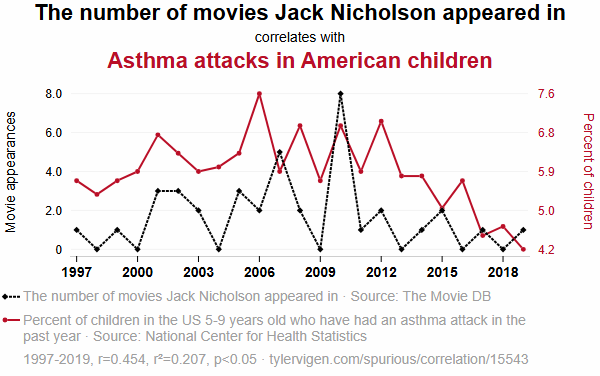
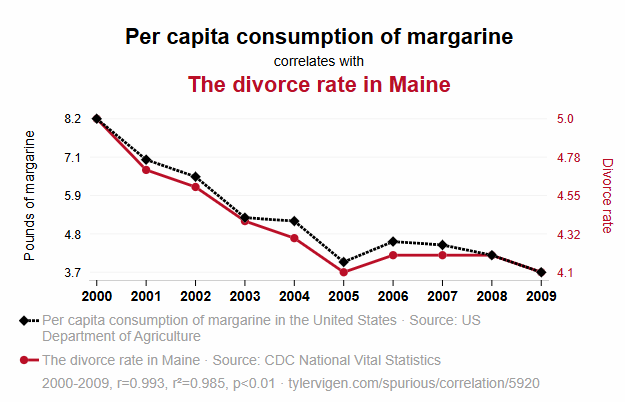

więcej na: https://tylervigen.com/spurious/correlation/15543_the-number-of-movies-jack-nicholson-appeared-in_correlates-with_asthma-attacks-in-american-children

### Czego o korelacji nauczyły nas rynki?

- **Korelacje nie są stałe** – zmieniają się dynamicznie wraz z upływem czasu.
- **W okresach kryzysów korelacje rosną** (tzw. korelacja konwergentna), co oznacza, że w sytuacjach ekstremalnych większość aktywów zaczyna poruszać się podobnie, zmniejszając efektywność dywersyfikacji.
- **Historyczne korelacje nie zawsze przewidują przyszłość** – bazowanie jedynie na danych historycznych może prowadzić do błędnych decyzji inwestycyjnych.


In [34]:
corr = data_log['GS'].rolling('252D').corr(data_log['JPM'])
vol = data_log['^GSPC'].rolling('252D').std()
fig = go.Figure()
fig.add_scatter(x=corr.index, y=corr, name='Korelacja')
fig.add_scatter(x=vol.index, y=vol, name='Zmienność S&P', yaxis='y2')
fig.update_layout(yaxis2=dict(overlaying='y', side='right', title='Zmienność'), yaxis=dict(title='Korelacja'), template = 'plotly_dark')
fig.show()

### Wzór na odchylenie standardowe portfela (dla dwóch aktywów)

$$
\sigma_p = \sqrt{w_1^2 \sigma_1^2 + w_2^2 \sigma_2^2 + 2 w_1 w_2 \rho_{12} \sigma_1 \sigma_2}
$$

Gdzie:  
- $ \sigma_p $ – odchylenie standardowe portfela (ryzyko portfela),  
- $ w_1, w_2 $ – wagi aktywów w portfelu,  
- $ \sigma_1, \sigma_2 $ – odchylenia standardowe aktywów,  
- $ \rho_{12} $ – współczynnik korelacji pomiędzy zwrotami z aktywów 1 i 2.


### Ogólny wzór (n aktywów)

$$
\sigma_p = \sqrt{\mathbf{w}^T \mathbf{\Sigma} \mathbf{w}}
$$

Gdzie:
- $ \mathbf{w} $ – wektor wag portfela (kolumna)  
- $ \mathbf{\Sigma} $ – macierz kowariancji między aktywami  
- $ \sigma_p $ – odchylenie standardowe portfela


In [51]:
#wagi


In [52]:
#Macierz kowariancji


In [50]:
# Odchylenie portfela
